Task 1: Titanic - Machine Learning from Disaster

# **Dataset:**
Titanic Dataset
# **Description:**
This task involves working with the Titanic dataset, which contains
passenger information from the ill-fated Titanic ship. The dataset
includes features such as age, gender, class, and whether passengers
survived or not.
# **The objective:**
Build a predictive model that can classify whether a passenger
survived or not based on the available features.
This is a binary classification problem.

Data Exploration
I will Begin by exploring the dataset to understand its structure and features. Check for missing data and outliers.


# **Dataset:**
Dataset columns are as follows:


*   Survival - Survival (0 = No, 1 = Yes)
*   Pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)


*   Sex - Sex
*  Age - Age in years
*   Sibsp - Number of siblings or spouses aboard the Titanic
*   Parch - Number of parents or children aboard the Titanic
*   Ticket - Ticket number
*   Fare - Passenger fare
*   Cabin - Cabin number
*   Embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Here's a high-level outline of how we'll proceed:
1. Loading and understanding the dataset:
    1. Train dataset: Includes passenger information (like age, gender, class, etc.) and whether they survived or not.
    2. Test dataset: Includes similar information but without the survival outcome (this is what we need to predict).
2. Data Preprocessing:
    1. Handle missing values.
    2. Convert categorical variables to numeric ones.
    3. Feature engineering (if necessary).
3. Model Selection:
   1. Use a classification algorithm like Logistic Regression, Random Forest, or others.
4. Training the model:
    1. Train the model on the training dataset.
5. Prediction and Submission:
   1. Predict on the test dataset.
    2. Generate a CSV submission file with PassengerId and predicted Survived values.


In [329]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [330]:
#Import Libraries for classification machine models such as logistic regression
# decision trees, random forest and xboost , KNN, Kmeans classification
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedGroupKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder

%matplotlib inline
pd.set_option('display.max_columns', None)



In [331]:
#apply plotly plots in jupyter notebook
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Inorder to display Plotly plots in a jupyter Notebook
import plotly.io as pio
pio.renderers.default = 'notebook'

# **Read the dataset**

In [332]:
train_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/learning/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Machine Learning/learning/test.csv')

# **Dataset Overview**

In [333]:
# Display the first few rows of the training dataset to understand the structure
train_data.head(), train_data.info(), test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

# **Training Dataset Basic Information**

In [334]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


1. Training set:
    891 records with 12 columns, including the target variable Survived.
    
    Some columns, such as Age, Cabin, and Embarked, contain missing values.
2. Test set:
    418 records with 11 columns (no Survived column, as we need to predict this).
    
    Similar missing values for Age, Fare, and Cabin

# **Training Dataset get numerical and categorical columns**


In [335]:
#Get the categorical and numerical columns
num_cols = train_data.select_dtypes(include=np.number).columns.tolist()
cat_cols = train_data.select_dtypes(exclude=np.number).columns.tolist()
print('Numerical Columns:', num_cols)
print('Categorical Columns:', cat_cols)


Numerical Columns: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical Columns: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [336]:
for column in num_cols:
    print(column)
    print(train_data[column].nunique())
    #print(test_data[column].unique())

PassengerId
891
Survived
2
Pclass
3
Age
88
SibSp
7
Parch
7
Fare
248


In [337]:
for column in cat_cols:
    print(column)
    print(train_data[column].unique())
    #print(test_data[column].unique())

Name
['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'T

In [338]:
train_data.describe(exclude=np.number)
#alternative train_data.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# **Training Dataset Numerical Columns Description**

In [339]:
#training dataset description for numerical
train_data.describe(include=np.number).round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [340]:
# Recheck for missing data
print(train_data.isnull().sum())
print("_"*40)
print("Test dataset")
print("_"*40)
print(test_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
________________________________________
Test dataset
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


The missing values have been successfully handled. Both the training and test datasets now have no missing values:

1. Age and Fare were filled using the median.
2. Embarked was filled using the mode (most frequent value).
3. Cabin was dropped due to a large proportion of missing data.

The datasets are now clean and ready for further analysis or model building.

# **Conclusion**
The Training dataset has information about 891 passengers of the Titanic disaster.

We have 12 variables including 11 independent variables and 1 dependent variable which is Survived.

The dataset contains missing values.

We have 8 categorical variables: Survived , PassengerId, Pclass, Name, Sex, Ticket, Cabin, Embarked

We have 4 numeric variables: Age, SibSp, Parch, Fare

## Numerical variables Univariate Analysis


In [341]:
numerical_columns = ['Age', 'Fare','SibSp', 'Parch']

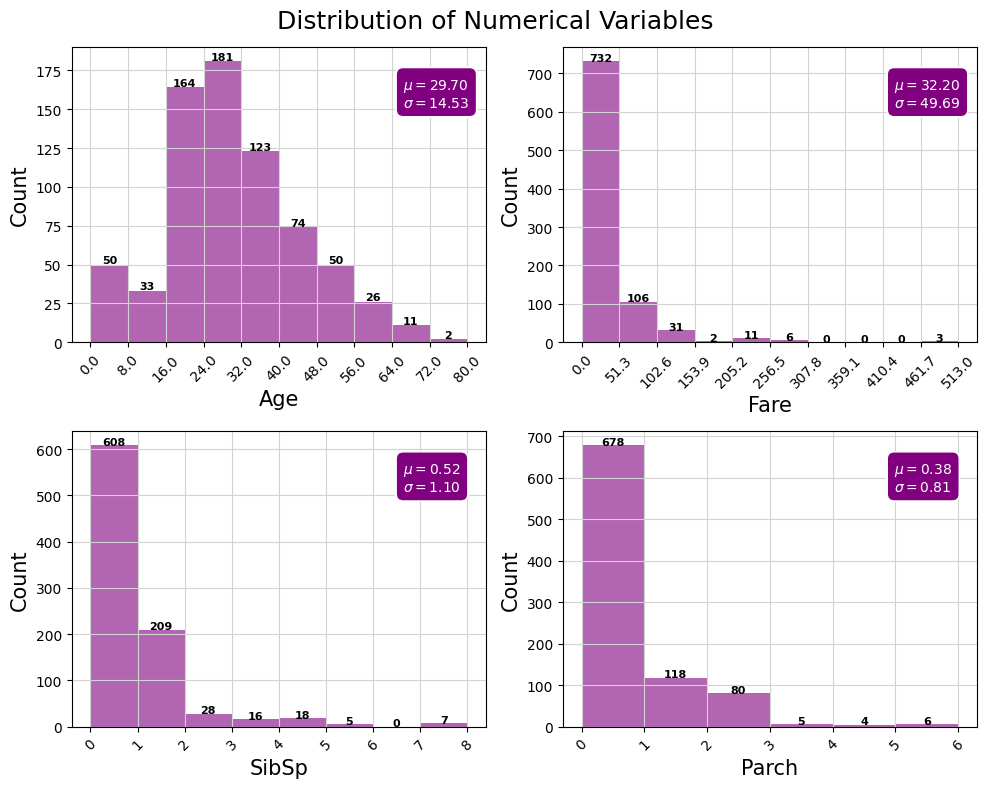

In [342]:
#Create Figure
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,8))
for i, col in enumerate(numerical_columns):
    x=i//2; y=i%2
    #determine number of bins for each feature
    if i < 2:
        _, bin_edges = np.histogram(train_data[col],range=(np.floor(train_data[col].min()),np.ceil(train_data[col].max())))
    else:
        bin_edges = range(train_data[col].min(),train_data[col].max()+1)
        #plot histograms
    graph = sns.histplot(data=train_data, x=col,bins=bin_edges, ax=ax[x,y], edgecolor='none',color='Purple', alpha=0.6)
    ax[x,y].set_xlabel(col,fontsize=15)
    ax[x,y].set_ylabel('Count',fontsize=15)
    ax[x,y].set_xticks(np.round(bin_edges,1))
    ax[x,y].set_xticklabels(ax[x,y].get_xticks(),rotation=45)
    ax[x,y].grid(color='lightgrey')
    for j,p in enumerate(graph.patches):
                ax[x,y].annotate ('{}'.format(p.get_height()),(p.get_x()+p.get_width()/2,p.get_height()+1),ha='center',fontsize=8, fontweight='bold')
                textstr = '\n'.join((r'$\mu=%.2f$' %train_data[col].mean(),r'$\sigma=%.2f$' %train_data[col].std()))
                ax[x,y].text(0.8,0.9,textstr,transform=ax[x,y].transAxes,fontsize=10,verticalalignment='top',color='white',bbox=dict(boxstyle='round', facecolor='Purple', edgecolor='white',pad=0.5))
plt.suptitle('Distribution of Numerical Variables', fontsize=18)
plt.tight_layout()
plt.show()

## Conclusion:
The average age of the passengers was about 30 years old, and according to the positive skewness of the histogram, they were generally young.
Most passengers have bought cheap tickets.
About 90% of passengers either did not have a family member with them or had at most 1 family member with them.

In [343]:
#Univariate analysis
#categorical data and numerical data
train_data.describe(include='object')
all_categorical_columns = ['Survived', 'Pclass', 'Sex', 'Embarked','Ticket', 'Cabin']
numerical_columns = ['Age', 'SibSp', 'Parch', 'Fare']



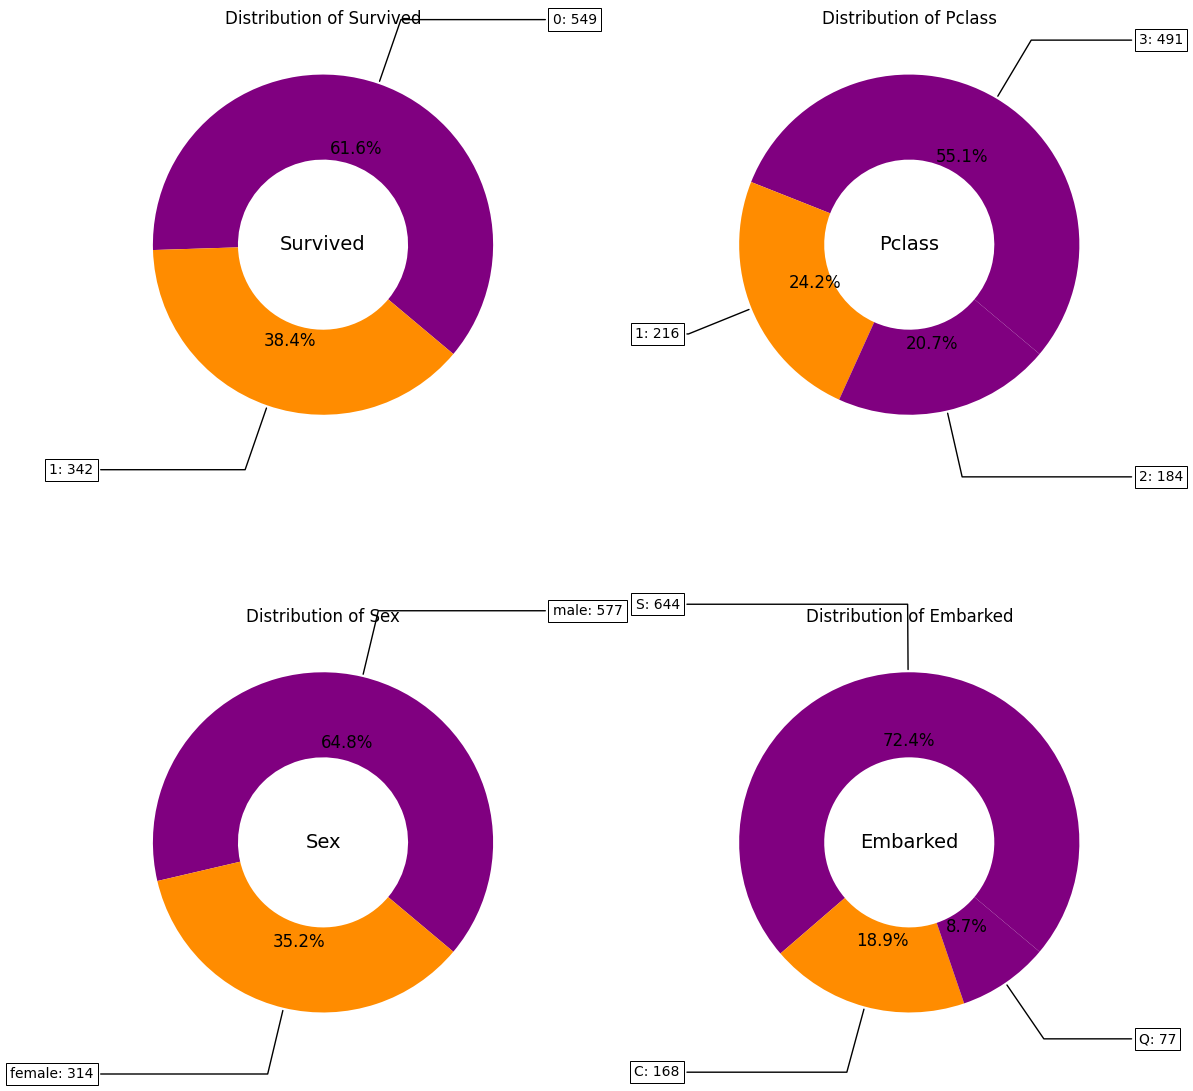

In [344]:
import numpy as np
import matplotlib.pyplot as plt

# Define the categorical columns
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Embarked']

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12), subplot_kw=dict(aspect="equal"))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each categorical column as a donut chart
for i, column in enumerate(categorical_columns):
    data = train_data[column].value_counts()
    wedges, texts, autotexts = axes[i].pie(
        data,
        wedgeprops=dict(width=0.5),
        startangle=-40,
        autopct='%.1f%%',
        textprops=dict(color='w')
    )

    # Set properties for the text labels inside the pie slices
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(12)
        autotext.set_ha('center')  # horizontal alignment
        autotext.set_va('center')  # vertical alignment

    # Annotation for each wedge
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for j, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1) / 2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        axes[i].annotate(f'{data.index[j]}: {data.iloc[j]}', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                         horizontalalignment=horizontalalignment, **kw)

    axes[i].set_title(f'Distribution of {column}')
    axes[i].text(0, 0, f'{column}', ha='center', va='center', fontsize=14, color='black')

# Adjust layout
plt.tight_layout()
plt.show()



In [345]:
categorical_columns = ['Survived', 'Pclass', 'Sex', 'Embarked']#create the subplots
fig = make_subplots(rows=1, cols=4, specs = [[{'type': 'domain'}]*4],vertical_spacing=0.01,horizontal_spacing=0.01)
for i, column in enumerate(categorical_columns):
   value_counts = train_data[column].value_counts()
   labels = value_counts.index.tolist()
   values = value_counts.values.tolist()

  #define color map based on purple color
   cmap = colors.LinearSegmentedColormap.from_list('purple', ['purple', 'white'])
   norm = colors.Normalize(vmin=0, vmax=len(labels))
   color_list = [colors.rgb2hex(cmap(norm(i))) for i in range(len(labels))]
  #create a piechart
   pi_chart = go.Pie(
                  labels=labels,
                  values=values,
                  hole =0.6,
                  marker=dict(colors=color_list,line=dict(color='white', width=1)),
                  textposition='inside',
                  textinfo='percent+label',
                  title = column.capitalize(),
                  titlefont=dict(size=16, color='black',family='Calibri'))

#add the pie chart to the subplot
   fig.add_trace(pi_chart, row=1, col=i+1)
fig.update_layout(showlegend=False,height=400,width=900,
                  title = {
                      'text': 'Distribution of Categorical Variable in Training Data',
                      'y':0.95,
                      'x':0.5,
                      'xanchor': 'center',
                      'yanchor': 'top',
                      'font': {'size': 20, 'color': 'black', 'family': 'Calibri'}
                  })
fig.show()



Output hidden; open in https://colab.research.google.com to view.

## Conclusion:
Almost 38% of the passengers in the training dataset survived, which indicates that the dataset is not completely balanced.
Almost 24% of passengers bought 1st class tickets, 21% bought 2nd class tickets and 55% bought 3d class tickets.
35% of the passengers in the training dataset were women and the rest were men.
Almost 72% of passengers embarked from Southampton port, 19% from Cherbourg port and 9% of passengers embarked from Queenstown port.

## Data Preprocessing:
Preprocess the data converting categorical variables into a suitable format for machine learning.

Since the portion of missing values in Embarked and Fare is very small compared to the total number of samples in both training and test datasets (approximately 0.2%), these missing values in the Embarked feature of train_data will be filled with the Mode value of this feature and in the Fare feature of test_data, we fill the missing values with the Median value of this feature in training data:

In [346]:
# Embarked imputation of train_data
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0] ,inplace=True)

# Fare imputation of test_data
test_data['Fare'].fillna(train_data['Fare'].median() ,inplace=True)

# Check Missing data

 ## Missing Value Treatment

Next, we define a function to visualize the percentage of missing values in each feature of a DataFrame in the form of a barplot. In this way, depending on the percentage of missing values in each feature, we can decide how to deal with missing values:

In [347]:
# check for missing data
print(train_data.isnull().sum())
print("_"*40)
print("Test dataset")
print("_"*40)
print(test_data.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
________________________________________
Test dataset
________________________________________
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [348]:
def missing_percent_plot(df, data_string):
    '''
    This function visualizes the percentage of missing data in each feature of a DataFrame
    '''
    # Calculate the percentage of missing value in each feature
    nan_percent= 100*(df.isnull().sum()/len(df))

    # Filtering features with missing value
    nan_percent= nan_percent[nan_percent>0].sort_values()
    nan_percent = round(nan_percent,1)

    # Plot the barh chart
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.barh(nan_percent.index, nan_percent.values, color='purple', height=0.65)

    # Annotate the values and indexes
    for i, (value, name) in enumerate(zip(nan_percent.values, nan_percent.index)):
        ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='purple', fontsize=12)

    # Set x-axis limit
    ax.set_xlim([0,110])

    # Add title and xlabel
    plt.title("Percentage of Missing Data in " + data_string, fontsize=14)
    plt.xlabel('Percentages (%)', fontsize=12)
    plt.show()

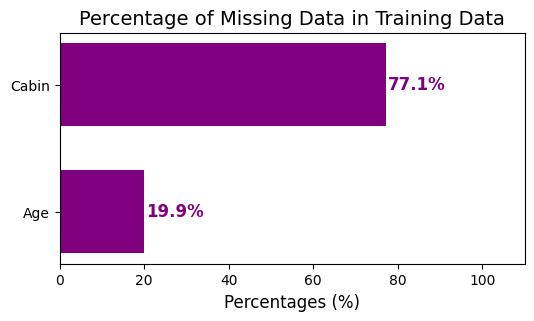

In [349]:
missing_percent_plot(train_data, 'Training Data')

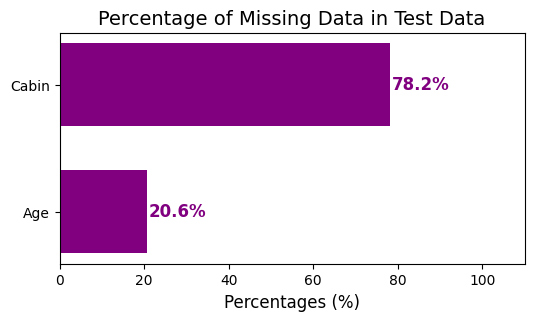

In [350]:
missing_percent_plot(test_data, 'Test Data')

Here's an analysis of the missing data from the original Titanic datasets:

  1. Training Dataset:
      * Age: 177 missing values (19.9% of the data).
      * Cabin: 687 missing values (77.1% of the data).
      * Embarked: 2 missing values.
  2. Test Dataset:
    * Age: 86 missing values (20.6% of the data).
    * Cabin: 327 missing values (78.2% of the data).
    * Fare: 1 missing value.
    
#Explanation:
* Age: A significant portion of passenger ages is missing, which is common in historical datasets like this. We filled these with the median age during preprocessing to prevent bias from missing values.

* Cabin: The majority of cabin data is missing, making it difficult to use this feature effectively. Given the large proportion of missing data, we dropped the Cabin column.

* Embarked: Only two values are missing, which we filled with the most frequent port (S).

* Fare: The test dataset had one missing fare, which we also filled with the median during preprocessing.

# Imputing the missing values
To properly handle the missing values, we will take the following steps:

1. Age: Use the median of the Age column to fill missing values.
2. Cabin: Since the Cabin column has a large amount of missing data (around 77%-78% in both datasets), it's best to drop this column as it may not provide much useful information.
3. Embarked: Fill the two missing values with the mode (most frequent value).
Fare (in test dataset): Fill the single missing value with the median.

In [351]:
# Fill missing values for Age and Fare using the median, and for Embarked using the most frequent value
# Dropping Cabin as it has too many missing values

#handle missing values for Age and Fare
#using simple imputer library from sklearn

# For Age, we'll use the median, and for Fare (in test set), we'll also use the median.
age_imputer = SimpleImputer(strategy="median")
train_data['Age'] = age_imputer.fit_transform(train_data[['Age']])
test_data['Age'] = age_imputer.transform(test_data[['Age']])

fare_imputer = SimpleImputer(strategy="median")
test_data['Fare'] = fare_imputer.fit_transform(test_data[['Fare']])

# For Embarked, fill missing values with the most frequent value (mode)
embarked_imputer = SimpleImputer(strategy="most_frequent")
# Use ravel to flatten the 2D array returned by fit_transform into a 1D array
train_data['Embarked'] = embarked_imputer.fit_transform(train_data[['Embarked']]).ravel()


# Drop the Cabin  due to excessive missing data or complexity
train_data.drop(columns=['Cabin','PassengerId'], inplace=True)
test_data.drop(columns=['Cabin','PassengerId'], inplace=True)

In [352]:
#fill missing values
#train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
##test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)
#train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
#test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
#test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)


In [353]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Feature Extraction
Feature extraction is the process of selecting and transforming raw data into a set of features that are suitable for machine learning models to consume.

Name feature contains different titles. Next, we extract these titles using RegEx and then check whether there is a correlation between these titles and survival. If there is correlation, we add these titles as new features to both datasets.

In [354]:
train_data['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


Looking at the Name feature, we notice that each title is preceded by a space and ends with a dot:

According to the existing pattern, we define a function in which titles are extracted from names of passengers using RegEx:

In [355]:
# Extract title from the Name column
# Titles are usually represented as parts of the Name column, like "Mr.", "Mrs.", "Miss.", etc.

# Define a function to extract title from the Name
def extract_title(name):
    # Titles are usually followed by a period (.), so we can split by the second part after the comma and first space
    return name.split(",")[1].split(".")[0].strip()

In [356]:
train_data['Title'] = train_data['Name'].apply(extract_title)
test_data['Title'] = test_data['Name'].apply(extract_title)

In [357]:
#drop the name column
train_data.drop(columns=['Name'], inplace=True)
test_data.drop(columns=['Name'], inplace=True)

In [358]:
train_data['Title'] = train_data['Title'].replace(['Ms', 'Mlle'],'Miss')
train_data['Title'] = train_data['Title'].replace(['Mme'],'Mrs')
train_data['Title'] = train_data['Title'].replace(['Dr','Rev','the','Jonkheer','Lady','Sir', 'the Countess','Don'],'Nobles')
train_data['Title'] = train_data['Title'].replace(['Major','Col', 'Capt'],'Navy')
train_data.Title.value_counts()

,count
Title,
Mr,517
Miss,185
Mrs,126
Master,40
Nobles,18
Navy,5


In [359]:
test_data['Title'] = test_data['Title'].replace(['Ms', 'Mlle'],'Miss')

test_data['Title'] = test_data['Title'].replace(['Mme'],'Mrs')
test_data['Title'] = test_data['Title'].replace(['Dr','Rev','the','Jonkheer','Lady','Sir', 'the Countess','Dona'],'Nobles')
test_data['Title'] = test_data['Title'].replace(['Major','Col', 'Capt'],'Navy')
test_data.Title.value_counts()

,count
Title,
Mr,240
Miss,79
Mrs,72
Master,21
Nobles,4
Navy,2


In [360]:
survival_rate_by_title = train_data.groupby('Title')['Survived'].mean()

# Display the survival rates
survival_rate_by_title

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Navy,0.400000
Nobles,0.333333


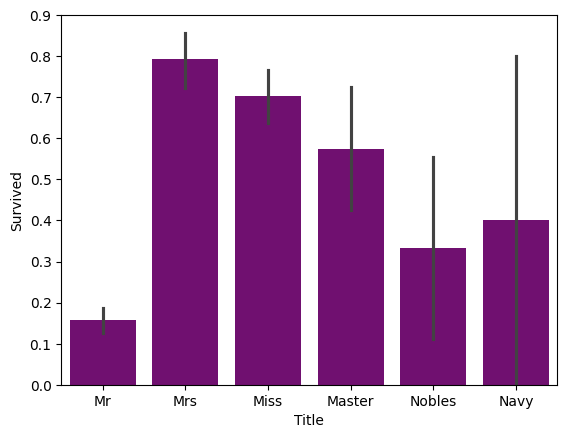

In [361]:
sns.barplot(x = 'Title', y = 'Survived', data = train_data)
plt.show()

# Categorical Features vs Target

In [362]:
# Define a list containing the names of categorical features in our dataset
Cat_Features = ['Pclass','Sex','Embarked','Title']

# Define the target name as a variable for simplicity
Target = 'Survived'

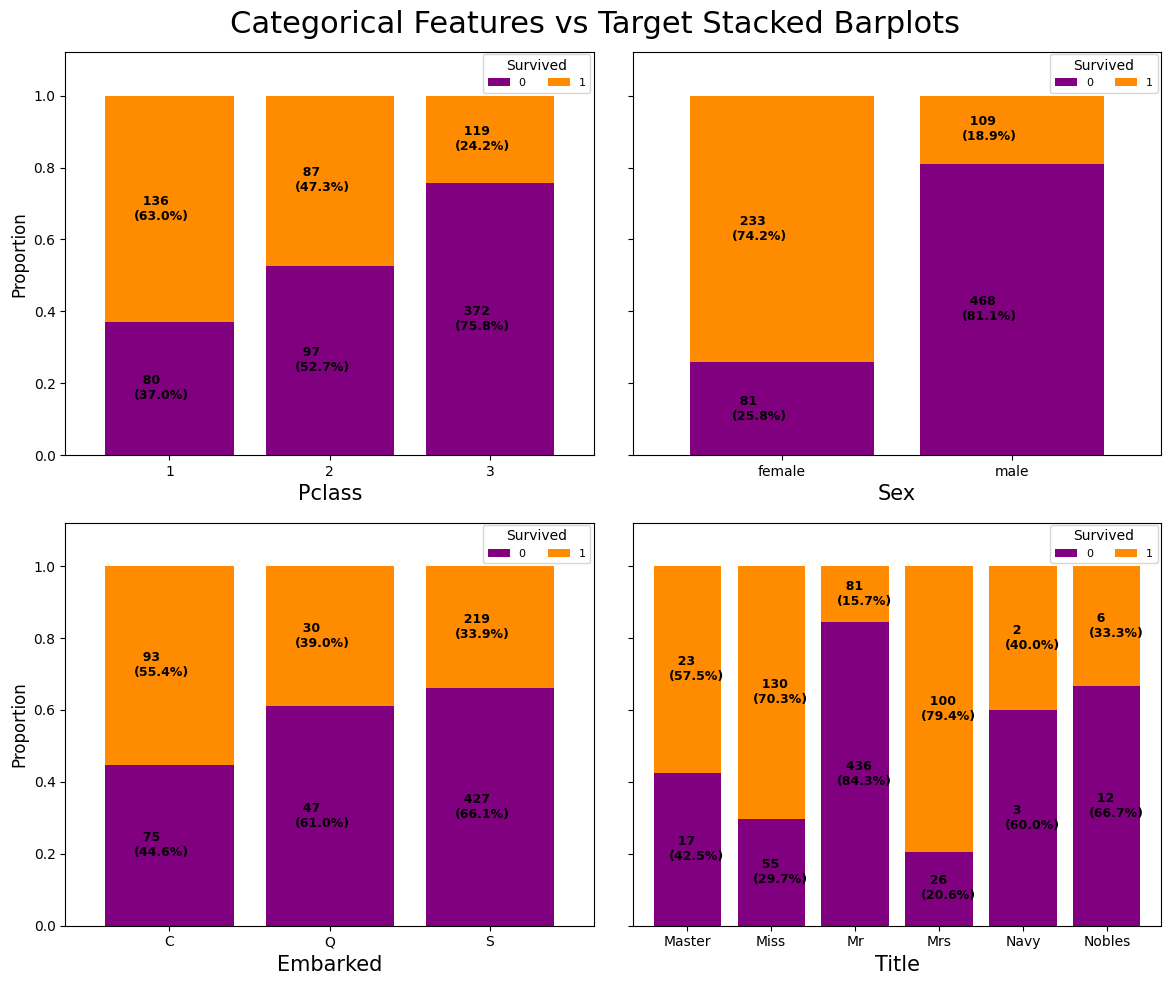

In [363]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

for i,col in enumerate(Cat_Features):

    # Create a cross tabulation showing the proportion of purchased and non-purchased loans for each category of the feature
    cross_tab = pd.crosstab(index=train_data[col], columns=train_data[Target])

    # Using the normalize=True argument gives us the index-wise proportion of the data
    cross_tab_prop = pd.crosstab(index=train_data[col], columns=train_data[Target], normalize='index')

    # Define colormap
    cmp = ListedColormap(['purple', 'darkorange'])

    # Plot stacked bar charts
    x, y = i//2, i%2
    cross_tab_prop.plot(kind='bar', ax=ax[x,y], stacked=True, width=0.8, colormap=cmp,
                        legend=False, ylabel='Proportion', sharey=True)

    # Add the proportions and counts of the individual bars to our plot
    for idx, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val],cross_tab.loc[val],cross_tab_prop.loc[val].cumsum()):
            ax[x,y].text(x=idx-0.22, y=(y_location-proportion)+(proportion/2)-0.03,
                         s = f'  {count}\n({np.round(proportion * 100, 1)}%)',
                         color = "black", fontsize=9, fontweight="bold")

    # Add legend
    ax[x,y].legend(title='Survived', loc=(0.79,0.9), fontsize=8, ncol=2)
    # Set y limit
    ax[x,y].set_ylim([0,1.12])
    # Rotate xticks
    ax[x,y].set_xticklabels(ax[x,y].get_xticklabels(), rotation=0)
    # Increase xlabel & ylabel font sizes
    ax[x,y].set_ylabel('Proportion', fontsize=12)
    ax[x,y].set_xlabel(col, fontsize=15)


plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize=22)
plt.tight_layout()
plt.show()

# Conclusion:
Almost all 4 categorical features have a good effect on the target variable because by changing the category in these features, the percentage of samples belonging to each class of the target has changed significantly.

# Numerical Features vs Target

In this section, we try to find the mean and distribution of numerical features for passengers who survived and did not survive the Titanic disaster:

In [364]:
# Define a list containing the names of important numerical features in the dataset
Num_Features = ['Age','Fare','SibSp','Parch']

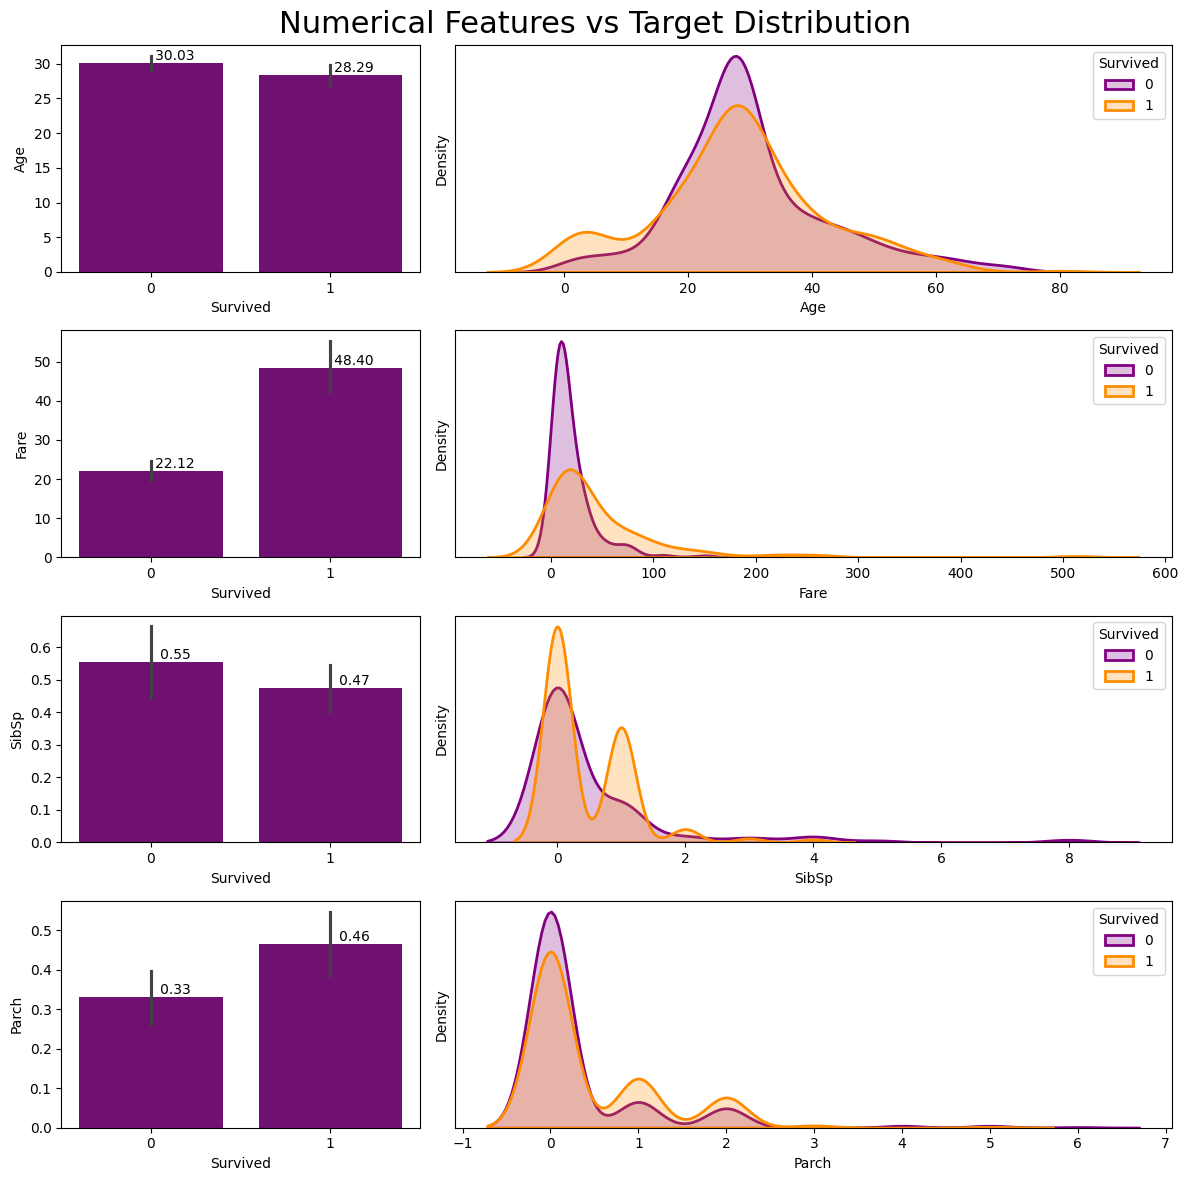

In [365]:
sns.set_palette(['purple', 'darkorange'])

fig, ax = plt.subplots(4, 2, figsize=(12,12), gridspec_kw={'width_ratios': [1, 2]})

for i,col in enumerate(Num_Features):
    # barplot
    graph = sns.barplot(data=train_data, x=Target, y=col, ax=ax[i,0])
    # kde Plot
    sns.kdeplot(data=train_data[train_data[Target]==0], x=col, fill=True, linewidth=2, ax=ax[i,1], label='0')
    sns.kdeplot(data=train_data[train_data[Target]==1], x=col, fill=True, linewidth=2, ax=ax[i,1], label='1')
    ax[i,1].set_yticks([])
    ax[i,1].legend(title='Survived', loc='upper right')
    # Add bar sizes to our plot
    for cont in graph.containers:
        graph.bar_label(cont, fmt='           %.2f')

plt.suptitle('Numerical Features vs Target Distribution', fontsize=22)
plt.tight_layout()
plt.show()

# Conclusion:¶
Among all of the numerical features seen in the above diagram, first the Fare feature and then the Age feature have the greatest impact on the target because the distribution and the average values of data belonging to each class of the target in these 2 features have changed significantly!

# Categorical Features Encoding

In [366]:
train_data.drop(columns=['Ticket'], inplace=True)
test_data.drop(columns=['Ticket'], inplace=True)

In [367]:
# Define a list containing the names of categorical features in our dataset
Cat_Features = ['Pclass','Sex','Embarked','Title']
# 1. Label Encode ordinal features (Pclass and Title)
label_encoder = LabelEncoder()

# Label encode 'Pclass' (assuming ordinal relationship)
train_data['Pclass'] = label_encoder.fit_transform(train_data['Pclass'])
test_data['Pclass'] = label_encoder.transform(test_data['Pclass'])

# Label encode 'Title' (assuming ordinal relationship after categorizing titles)
train_data['Title'] = label_encoder.fit_transform(train_data['Title'])
test_data['Title'] = label_encoder.transform(test_data['Title'])

# 2. One-Hot Encode nominal features (Sex and Embarked)
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

# Check the result of encoding
print(train_data.head())
print(test_data.head())


   Survived  Pclass   Age  SibSp  Parch     Fare  Title  Sex_male  Embarked_Q  \
0         0       2  22.0      1      0   7.2500      2      True       False   
1         1       0  38.0      1      0  71.2833      3     False       False   
2         1       2  26.0      0      0   7.9250      1     False       False   
3         1       0  35.0      1      0  53.1000      3     False       False   
4         0       2  35.0      0      0   8.0500      2      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
   Pclass   Age  SibSp  Parch     Fare  Title  Sex_male  Embarked_Q  \
0       2  34.5      0      0   7.8292      2      True        True   
1       2  47.0      1      0   7.0000      3     False       False   
2       1  62.0      0      0   9.6875      2      True        True   
3       2  27.0      0      0   8.6625      2      True       False   
4       2  22.0      1      1  12.2875      3     False       

# Explanation:
1. Label Encoding: Pclass and Title are treated as ordinal categorical features, meaning they have an inherent order (like passenger class).
2. One-Hot Encoding: Sex and Embarked are nominal categorical features with no inherent order, so we use One-Hot Encoding to create binary columns for each category.

By applying these encoding techniques, the dataset will be ready for model training with numerical representations of categorical data.

# Correlatation Analysis

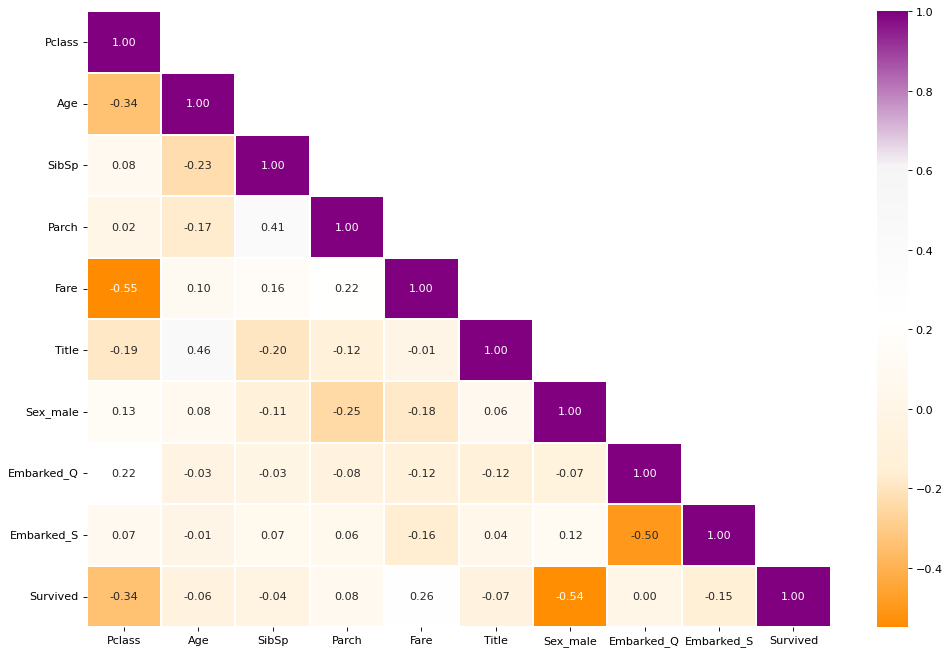

In [368]:
# Define a customized colormap

## Define the number of colors in the colormap
num_colors = 256
## Create a list of colors with the two defined colors as the endpoints
colors = ['darkorange', '#FFEFD5', 'white', '#F5F5F5',  'purple']
## Create a custom colormap with the defined colors
my_cmap = LinearSegmentedColormap.from_list('my_colormap', colors, num_colors)

# Calculation of the Spearman correlation
target = 'Survived'
train_data_ordered = pd.concat([train_data.drop(target,axis=1), train_data[target]],axis=1)
corr = train_data_ordered.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(15,10), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=my_cmap, fmt='.2f', linewidths=0.2)
plt.show()

# Model Building:
Choose and implement machine learning algorithms for classification, such as logistic regression, decision trees, random forests, or others.

Model Evaluation: Evaluate the performance of your model using appropriate metrics like accuracy, precision,recall, and F1-score.

Model Tuning: Experiment with hyperparameter tuning to improve model performance

Documentation: Create a report documenting your approach, findings, and the rationale behind your model choices.

## Train Test Split

We need to perform **train test split** in supervised machine learning to evaluate the performance of a model after it has been trained. The data set is typically divided into two parts; the training set which is used to train the model, and the test set which is used to measure how well the model performs on new data.

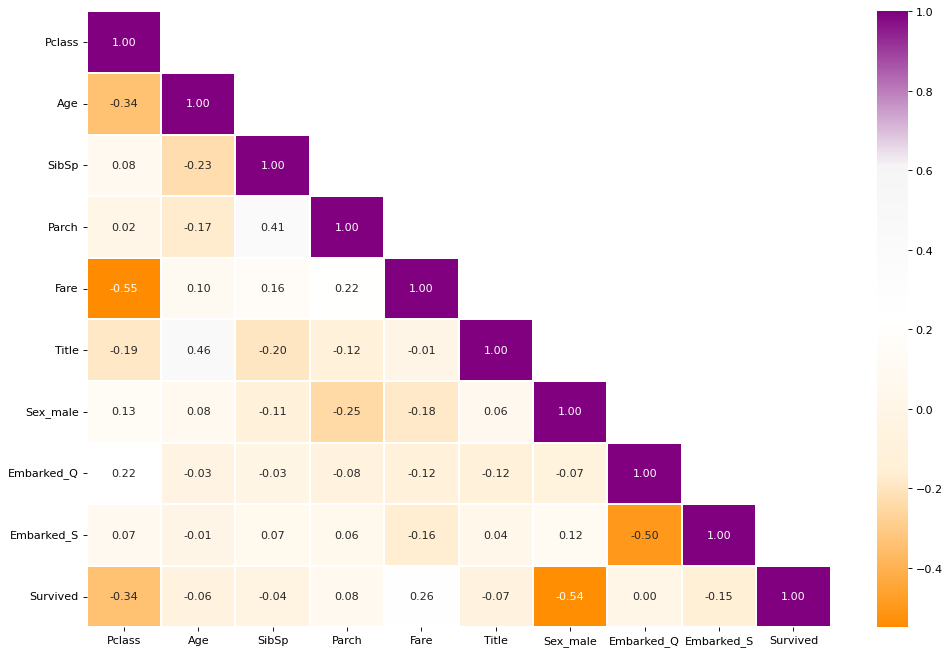

In [369]:
# Define a customized colormap

## Define the number of colors in the colormap
num_colors = 256
## Create a list of colors with the two defined colors as the endpoints
colors = ['darkorange', '#FFEFD5', 'white', '#F5F5F5',  'purple']
## Create a custom colormap with the defined colors
my_cmap = LinearSegmentedColormap.from_list('my_colormap', colors, num_colors)

# Calculation of the Spearman correlation
target = 'Survived'
df_train_ordered = pd.concat([train_data.drop(target,axis=1), train_data[target]],axis=1)
corr = df_train_ordered.corr()

# Create a mask so that we see the correlation values only once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True

# Plot the heatmap correlation
plt.figure(figsize=(15,10), dpi=80)
sns.heatmap(corr, mask=mask, annot=True, cmap=my_cmap, fmt='.2f', linewidths=0.2)
plt.show()

In [370]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [372]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ',y_test.shape)

X_train shape:  (712, 9)
X_test shape:  (179, 9)
y_train shape:  (712,)
y_test shape:  (179,)


# Random Forest Classifier

In [373]:
#  Train the model (Random Forest Classifier)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_val_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.7989


In [374]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [375]:
# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
log_reg = LogisticRegression(max_iter=1000)
svc_model = SVC(kernel='linear')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=5)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
nb_model = GaussianNB()

# Train and evaluate each model
models = {
    "Logistic Regression": log_reg,
    "Support Vector Machine": svc_model,
    "K-Nearest Neighbors": knn_model,
    "Gradient Boosting": gb_model,
    "Naive Bayes": nb_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

# Iterate through models and evaluate
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on validation data
    y_val_pred = model.predict(X_val)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)

    print(f"{model_name} Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8101
Support Vector Machine Accuracy: 0.7821
K-Nearest Neighbors Accuracy: 0.7095
Gradient Boosting Accuracy: 0.8156
Naive Bayes Accuracy: 0.7598
Random Forest Accuracy: 0.8212
XGBoost Accuracy: 0.8324


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[15:06:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




The best Model is XGBoost model With accuracy of 83%

# Tune Model

In [376]:
# Initialize the XGBoost Classifier using optimal hyperparameters
xgb_final = XGBClassifier(max_depth=6,
                          learning_rate=0.05,
                          n_estimators=200,
                          min_child_weight=2,
                          scale_pos_weight=0.5,
                          subsample=0.9 ,
                          colsample_bytree=0.5,
                          colsample_bylevel=0.8 ,
                          reg_alpha=0.05 ,
                          reg_lambda=0.1 ,
                          max_delta_step=2 ,
                          gamma=0.1,
                          random_state=42)

# Train the model on the whole dataset
xgb_final.fit(X_train, y_train)
#check accuracy
y_pred = xgb_final.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.8715


Submission

In [377]:
train_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_male,Embarked_Q,Embarked_S
0,0,2,22.0,1,0,7.2500,2,True,False,True
1,1,0,38.0,1,0,71.2833,3,False,False,False
2,1,2,26.0,0,0,7.9250,1,False,False,True
3,1,0,35.0,1,0,53.1000,3,False,False,True
4,0,2,35.0,0,0,8.0500,2,True,False,True


In [381]:
# Target prediction for test.csv samples using relavant features
##xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=True, eval_metric='logloss', random_state=42)
# Train the model on the whole dataset
xgb_final.fit(X, y)
y_pred = xgb_final.predict(test_data)

# Generate and save the submission file according to gender_submission.csv
df_submission = pd.read_csv('/content/drive/MyDrive/Machine Learning/learning/gender_submission.csv')
df_submission['Survived'] = y_pred
df_submission.to_csv('/content/drive/MyDrive/Machine Learning/learning/XGBoost_Submission.csv', index=False)